# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.13.0


## Creating data to view and fit

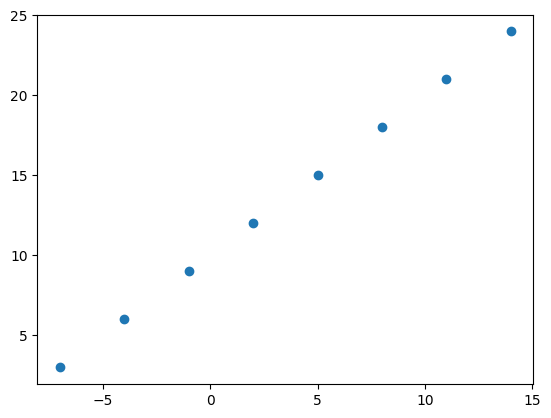

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
# Turn our numpy array to tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

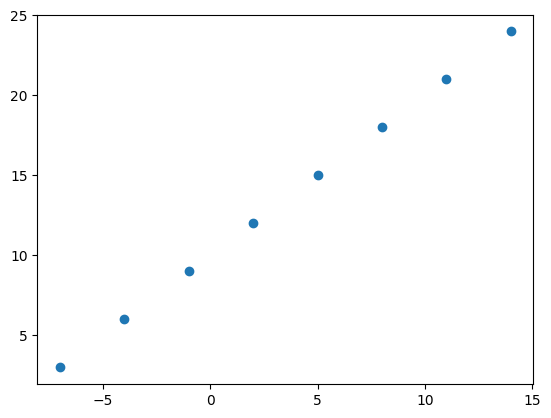

In [7]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow
1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function with tells our model how wrong it is) and the optimizer (tell our model to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [8]:
X.shape, X.ndim

(TensorShape([8]), 1)

In [9]:
X = tf.expand_dims(X, axis=-1)

In [10]:
X.ndim, X.shape

(2, TensorShape([8, 1]))

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 332ms/step - loss: 10.7894 - mae: 10.7894
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 10.6569 - mae: 10.6569
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 10.5244 - mae: 10.5244
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 10.3919 - mae: 10.3919
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.2594 - mae: 10.2594


In [12]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 71ms/step


array([[16.19078]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2.  **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization of the optimization function.
3.  **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more example to learn from).

In [14]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 251ms/step - loss: 13.6300 - mae: 13.6300
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.4975 - mae: 13.4975
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3650 - mae: 13.3650
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 13.2325 - mae: 13.2325
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 13.1000 - mae: 13.1000
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 12.9675 - mae: 12.9675
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 12.8350 - mae: 12.8350
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 12.7025 - mae: 12.7025
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 12.5700 - mae: 12.5700
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 12.4375 - mae: 12.4375
Epoch 11/100
1/1 [==============================] - 0s 5

In [15]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 76ms/step


array([[29.993786]], dtype=float32)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 423ms/step - loss: 12.6693 - mae: 12.6693
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.9677 - mae: 11.9677
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.2540 - mae: 11.2540
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5261 - mae: 10.5261
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 9.7826 - mae: 9.7826
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.0219 - mae: 9.0219
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.2425 - mae: 8.2425
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4425 - mae: 7.4425
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8122 - mae: 6.8122
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9068 - mae: 6.9068
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - los

In [26]:
model.predict([17.0])

1/1 [==============================] - 0s 60ms/step


array([[27.209099]], dtype=float32)